# **TP Examen**

- Le Notebook est à remplir et à déposer sur Moodle au bout d'une heure.
- L'examen est individuel, chacun doit travailler seul et rendre son fichier.
- Vous pouvez utiliser toutes les ressources que vous voulez, il est juste interdit de communiquer.
- **Renommez le fichier NOM_tp_Examen.ipynb en remplaçant NOM par votre nom.**
- Vous devez répondre aux questions dans les cellules prévues à cet effet. Vous pouvez ajouter des cellules si vous le souhaitez. **Chaque réponse doit être justifié avec du code.**

# Importation des bibliothèques

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import sklearn  # machine learning

In [8]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importation du jeu de données

In [9]:
# Importing the dataset
from sklearn.datasets import load_wine
wine = load_wine()

Pour ce TP, nous utiliserons le jeu de données Wine de Scikit-learn, vous pouvez trouver plus d'informations sur ce jeu de données ici : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

## Question 1 :

In [10]:
### Combien d'échantillons y a-t-il dans le jeu de donnée ? ### 
print(f"Il y a {wine.data.shape[0]} échantillons dans le jeu de données.")

### Combien de variables y a-t-il dans le jeu de donnée ? Donner leur nom. ### 
print(f"Il y a {wine.data.shape[1]} variables dans le jeu de données, qui sont:")
print(wine.feature_names)

### Combien de classes y a-t-il dans le jeu de donnée ? Donner leur nom. ### 
print(f"Il y a {wine.target_names.shape[0]} classes dans le jeu de données, qui sont:")
print(wine.target_names)


Il y a 178 échantillons dans le jeu de données.
Il y a 13 variables dans le jeu de données, qui sont:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Il y a 3 classes dans le jeu de données, qui sont:
['class_0' 'class_1' 'class_2']


## Question 2 :

In [12]:
import pandas as pd


### Mettre le jeu de donnée dans un dataframe Pandas et afficher les 10 premières lignes du jeu de données ###
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target']=wine.target
# Afficher les 10 premières lignes
print(df_wine.head(10))


### Vérifier les dimensions du jeu de données. Les dimensions correspondent-elles à votre réponse de la question 1 ? ###
# Shape of the dataset (nb of rows and columns)
print(df_wine.shape)
print(df_wine.columns)


#Réponse : oui ! en ajoutant l'attribut target on aura les 14 colonnes. 


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

## Question 3 :

In [16]:
### Vérifier que le jeu de données ne contient pas de valeurs manquantes ou invalides. ###
print(df_wine.isnull().sum())

print("On remarque qu'il y a pas des valeurs manquants.")

### Donner deux solutions dans le cas où il y a des valeurs manquantes ou invalides. ### 

print("solution 1 : On Supprime les lignes où les colonnes contenant des valeurs manquantes.")
print("solution 2 : On remplace les valeurs manquantes par une valeur appropriée")


### Donner le code pour appliquer au moins une des deux solutions proposées. ###

df_wine.dropna(inplace=True)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
On remarque qu'il y a pas des valeurs manquants.
solution 1 : On Supprime les lignes où les colonnes contenant des valeurs manquantes.
solution 2 : On remplace les valeurs manquantes par une valeur appropriée


## Question 4 :

In [19]:
### Afficher la distribution des classes du jeu de données. ###

print(wine.target_names)

# Count of each target value
print(df_wine['target'].value_counts())

# Same as above but in percentage
print(df_wine['target'].value_counts(normalize=True))

### La distribution des classes est-elle équilibrée ? ###

print("Non, la distribution des classes n'est pas équilibrée car la proportion d'échantillons pour chaque classe est différente ,  La  premiere classe  représente environ 40% des échantillons par contre les classes 0 et 2 représentent respectivement environ 33% et 27% des échantillons ( 39%, 33% et 26%)")


['class_0' 'class_1' 'class_2']
1    71
0    59
2    48
Name: target, dtype: int64
1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64
Non, la distribution des classes n'est pas équilibrée car la proportion d'échantillons pour chaque classe est différente ,  La  premiere classe  représente environ 40% des échantillons par contre les classes 0 et 2 représentent respectivement environ 33% et 27% des échantillons ( 39%, 33% et 26%)


## Question 5 :

In [20]:
### Diviser votre jeu de données en un jeu d'entraînement avec les trois quarts des données et un jeu de test avec l'autre quart des données. ###
X = df_wine.drop(['target'], axis=1)

y = df_wine['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Question 6.1 :

[Text(0.5, 0.9, 'x[11] <= 2.19\nentropy = 1.567\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(0.3076923076923077, 0.7, 'x[10] <= 0.898\nentropy = 0.592\nsamples = 42\nvalue = [0, 6, 36]'),
 Text(0.15384615384615385, 0.5, 'x[6] <= 1.49\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.07692307692307693, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]'),
 Text(0.23076923076923078, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.46153846153846156, 0.5, 'x[6] <= 0.565\nentropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.38461538461538464, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5384615384615384, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.6923076923076923, 0.7, 'x[0] <= 12.785\nentropy = 0.999\nsamples = 91\nvalue = [44, 47, 0]'),
 Text(0.6153846153846154, 0.5, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.7692307692307693, 0.5, 'x[12] <= 655.0\nentropy = 0.529\nsamples = 50\nvalue = [44, 6, 0]')

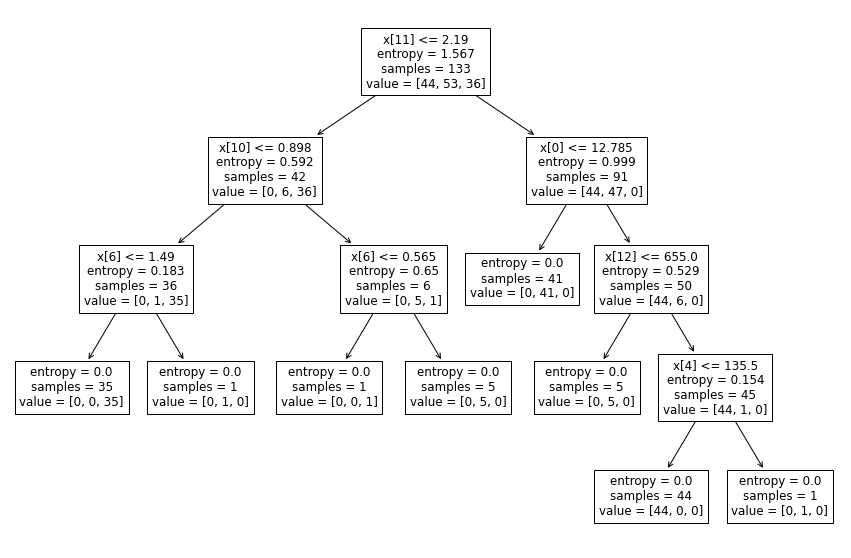

In [21]:
### Construire un arbre de décision avec le critère ENTROPY et l'entrainer sur vos données. ###

from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_Entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model aka train the model on X_train
clf_Entropy.fit(X_train, y_train)



### Afficher l'arbre de décision. ###
plt.figure(figsize=(15,10))

from sklearn import tree

tree.plot_tree(clf_Entropy.fit(X_train, y_train)) 


# Question 6.2 :

In [36]:
### Afficher l'accuracy de l'arbre de décision sur le jeu d'entraînement ET sur le jeu de test. ###

from sklearn.metrics import accuracy_score

# La Prédiction sur le jeu d'entraînement
y_train_pred = clf_Entropy.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Accuracy on training set with criterion Entropy index: {:.3f}".format(train_acc))



# La Prédiction sur le jeu de test
y_test_pred = clf_Entropy.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set with criterion Entropy index: {:.3f}".format(test_acc))



### Afficher les 10 premières prédictions de l'arbre de décision sur le jeu de test et comparer avec les vraies valeurs. ###
predictions = clf_Entropy.predict(X_test)
print(predictions[:10])
print(y_test[:10].values)


###Combien y a-t-il d'erreurs sur ces 10 premières prédictions ? ###
print("il y a 2 erreurs ")


Accuracy on training set with criterion Entropy index: 1.000
Accuracy on test set with criterion Entropy index: 0.889
[0 0 1 0 1 0 1 2 1 0]
[0 0 2 0 1 0 1 2 1 2]
il y a 2 erreurs 


## Question 7.1 :

In [46]:
### Construire un classifieur de K plus proches voisins (avec k=4) et l'entrainer sur vos données. ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with 4 neighbors
model = KNeighborsClassifier(n_neighbors=4)
# Train the model using the training sets
model.fit(X_train, y_train)

# Accuracy of the model on the training set
print(model.score(X_train, y_train))

0.8120300751879699


## Question 7.2 :

In [47]:
# Predict the response for test dataset
predict = model.predict(X_test)



### Afficher l'accuracy de votre classifieur sur le jeu d'entraînement ET sur le jeu de test. ###
print(accuracy_score(predict, y_test))


### Afficher les 10 premières prédictions de l'arbre de décision sur le jeu de test et compåarer avec les vraies valeurs. ###

print(predict[:20])
print(y_test[:20].values)


### Combien y a-t-il d'erreurs sur ces 10 premières prédictions ? ###
print("il y a 5 erreurs")

0.6888888888888889
[2 0 2 0 1 0 1 0 2 0 2 2 0 1 0 1 1 1 0 1]
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1]
il y a 5 erreurs


## Question 8 :

Confusion Matrice for K=4:


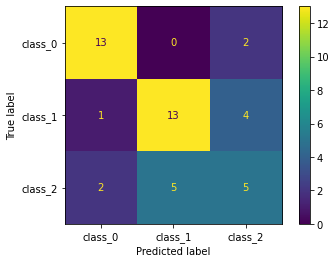

Confusion Matrix for Entropy:


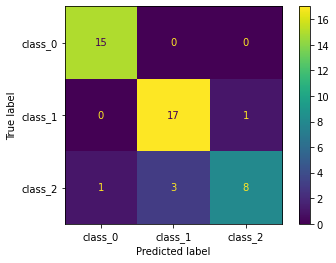

In [39]:
### Afficher la matrice de confusion de vos DEUX CLASSIEURS (en les nommant) sur le jeu de test. ###




### Afficher la matrice de confusion  pour K=4: ###

print("Confusion Matrice for K=4:")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot()
plt.show()

### Afficher la matrice de confusion  pour Entropy: ###

print("Confusion Matrix for Entropy:")
cn = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cn, display_labels=wine.target_names)
disp.plot()
plt.show()


## Question 9 :

In [49]:
from sklearn.metrics import classification_report

### Quel est le taux de faux positif et faux négatif de chaque classifieur ? ###
print("entropy : ")

for i in range(len(wine.target_names)):
    fp_rate = cn[i, 1] / (cn[i, 0] + cn[i, 1])
    fn_rate = cn[i, 0] / (cn[i, 0] + cn[i, 1])
    print("Class {} - FPR: {:.2f}, FNR: {:.2f}".format(wine.target_names[i], fp_rate, fn_rate))

# Compute false positive rate and false negative rate for each class
print("knn : ")
for i in range(len(wine.target_names)):
    fp_rate = cm[i, 1] / (cm[i, 0] + cm[i, 1])
    fn_rate = cm[i, 0] / (cm[i, 0] + cm[i, 1])
    print("Class {} - FPR: {:.2f}, FNR: {:.2f}".format(wine.target_names[i], fp_rate, fn_rate))


from sklearn.metrics import classification_report

# Classification report for Entropy

print(classification_report(y_test, y_pred_en, target_names=wine.target_names))


# Classification report for Knn avec k=4
print(classification_report(y_test, predict, target_names=wine.target_names))



### Quel est le taux de précision, rappel et f1-score de chaque classifieur ? ###

print('le taux de précision, rappel et f1-score pour classifieur Entropy est affiché au premier tableau . ')
print('le taux de précision, rappel et f1-score pour classifieur Knn est affiché au deuxième  tableau . ')





### Quel est le meilleur classifieur ? Pourquoi (bien justifier !) ? ###
print(' arpès les résultats obtenus par le traitements , on remarque que le meilleur classifieur dans notre cas est le classifieur ENTROPY ')
print("car l'accuracy d'ENTROPY est plus grand que cel de knn ")

entropy : 
Class class_0 - FPR: 0.00, FNR: 1.00
Class class_1 - FPR: 1.00, FNR: 0.00
Class class_2 - FPR: 0.75, FNR: 0.25
knn : 
Class class_0 - FPR: 0.00, FNR: 1.00
Class class_1 - FPR: 0.93, FNR: 0.07
Class class_2 - FPR: 0.71, FNR: 0.29
              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        15
     class_1       0.85      0.94      0.89        18
     class_2       0.89      0.67      0.76        12

    accuracy                           0.89        45
   macro avg       0.89      0.87      0.87        45
weighted avg       0.89      0.89      0.88        45

              precision    recall  f1-score   support

     class_0       0.81      0.87      0.84        15
     class_1       0.72      0.72      0.72        18
     class_2       0.45      0.42      0.43        12

    accuracy                           0.69        45
   macro avg       0.66      0.67      0.67        45
weighted avg       0.68      0.69      0.68        45

## Question 10 :

In [ ]:
### Donner trois solutions pour améliorer l'accuracy de votre classifieur. ###



1 - Augmenter la quantité et la qualité des données d'entraînement ( Enrichir le jeu de données ) .


2 - Utiliser des algorithmes de classification plus avancés : il est possible que le modèle que vous avez choisi ne soit pas le plus approprié pour vos données. Essayez différents types de modèles, tels que les forêts aléatoires ou les réseaux de neurones, pour voir si cela améliore les performances de votre modèle.

3 - Utiliser des techniques de prétraitement des données : Les données brutes peuvent être difficiles à interpréter pour un classifieur. Les techniques de prétraitement des données peuvent aider à réduire le bruit et à mettre en évidence les caractéristiques importantes des données, ce qui peut améliorer la précision de votre classifieur .

4- Optimiser les hyperparamètres : en optimisant les hyperparamètres, tels que la profondeur maximale de l arbre de décision, ou les paramètres de régularisation pour le classifieur bayésien naïf, on peut améliorer les performances du modèle.
